# Домашнє завдання
Не турбуйтеся, якщо у вас не буде все одразу виходити. Робота будь-якого дата саєнтіста тісно пов'язана з пошуком та дослідженнями, тому дуже важливо навчитися шукати потрібну інформацію та адаптувати її під свої потреби. Також, з будь-якими питаннями ви можете звертатися до ментора.

## Частина третя: Аналіз датасет c Kaggle.com
У цій частині домашньої роботи ми ще більше заглибимося в бібліотеку pandas та розглянемо просунутіші функції.

Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності). Після цього переходьте до завдання

Для виконання цієї частини домашнього завдання потрібно буде не тільки написати код, а й відповісти на супутні запитання. Там, де ви побачите виділений жирним шрифтом напис відповідь: потрібно буде вставити питання у файл і відповідь на нього.

Наприклад:

Яка бібліотека використовується для роботи з датафреймами у python? Відповідь: pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Необхідно виконати:

Прочитайте csv файл (використовуйте функцію read_csv)

In [2]:
data = pd.read_csv("bestsellers with categories.csv")

Виведіть перші п'ять рядків (використовується функція head)

In [3]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [4]:
data.shape

(550, 7)

Про скільки книг зберігає дані датасет? Відповідь: 550

Для кожної з книг доступні 7 змінних (колонок). Давайте розглянемо їх детальніше:

Name - назва книги

Author - автор

User Rating - рейтинг (за 5-бальною шкалою)

Reviews - кількість відгуків

Price - ціна (у доларах станом на 2020 рік)

Year - рік, коли книга потрапила до рейтингу Топ-50

Genre - жанр

Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [5]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

## Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [6]:
data.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні). Відповідь: Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [7]:
pd.unique(data["genre"])

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Відповідь: Fiction та Non Fiction

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: ylabel='Frequency'>

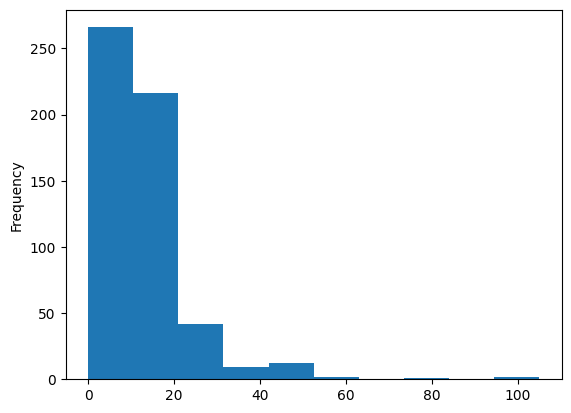

In [8]:
data["price"].plot(kind='hist')

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [9]:
print("Максимальна ціна? Відповідь:", data["price"].max())
print("Мінімальна ціна? Відповідь:", data["price"].min())
print("Середня ціна? Відповідь:", data["price"].mean())
print("Медіанна ціна? Відповідь:", data["price"].median())

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


## Пошук та сортування даних

In [10]:
print("Який рейтинг у датасеті найвищий? Відповідь:", data["user_rating"].max())

Який рейтинг у датасеті найвищий? Відповідь: 4.9


In [11]:
print("Скільки книг мають такий рейтинг? Відповідь:", data[data["user_rating"] == data["user_rating"].max()]["name"].count())

Скільки книг мають такий рейтинг? Відповідь: 52


In [12]:
print("Яка книга має найбільше відгуків? Відповідь:", data.loc[data["reviews"].idxmax()]["name"])

Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing


In [13]:
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:", data.loc[data["price"][data["year"] == 2015].idxmax()]["name"])

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [14]:
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:", data[(data["genre"] == "Fiction") & (data["year"] == 2010)]["name"].count())

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20


In [15]:
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:", data[(data["user_rating"] == 4.9) & ((data["year"] == 2010) | (data["year"] == 2011))]["name"].count())
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:", data[data["user_rating"] == 4.9].isin({"year": [2010, 2011]})["year"].sum())

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [16]:
tmp = data[data["year"] == 2015].sort_values(by=["price"], ascending=False)
tmp

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
501,Thug Kitchen: The Official Cookbook: Eat Like ...,Thug Kitchen,4.6,11128,23,2015,Non Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
483,The Whole30: The 30-Day Guide to Total Health ...,Melissa Hartwig Urban,4.6,7508,16,2015,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
492,The Wright Brothers,David McCullough,4.7,6169,16,2015,Non Fiction
34,Being Mortal: Medicine and What Matters in the...,Atul Gawande,4.8,11113,15,2015,Non Fiction


In [17]:
print("Яка книга остання у відсортованому списку? Відповідь:", tmp.tail(1)["name"].values[0])

Яка книга остання у відсортованому списку? Відповідь: To Kill a Mockingbird


## Агрегування даних та з'єднання таблиць
Остання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, pandas робить усі операції простими та зрозумілими.

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [18]:
tmp = data.groupby(["genre"]).agg(min = ('price', 'min'), max = ('price', 'max'))
tmp

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [19]:
print("Максимальна ціна для жанру Fiction: Відповідь:", tmp.loc["Fiction"]["max"])

Максимальна ціна для жанру Fiction: Відповідь: 82


In [20]:
print("Мінімальна ціна для жанру Fiction: Відповідь:", tmp.loc["Fiction"]["min"])

Мінімальна ціна для жанру Fiction: Відповідь: 0


In [21]:
print("Максимальна ціна для жанру Non Fiction: Відповідь:", tmp.loc["Non Fiction"]["max"])

Максимальна ціна для жанру Non Fiction: Відповідь: 105


In [22]:
print("Мінімальна ціна для жанру Non Fiction: Відповідь:", tmp.loc["Non Fiction"]["min"])

Мінімальна ціна для жанру Non Fiction: Відповідь: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [23]:
tmp = data.groupby(["author"]).agg(count = ('name', 'count'))
tmp

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [24]:
print("Якої розмірності вийшла таблиця? Відповідь:", tmp.shape)

Якої розмірності вийшла таблиця? Відповідь: (248, 1)


In [25]:
print("Який автор має найбільше книг? Відповідь:", tmp.loc[tmp["count"].idxmax()].name)

Який автор має найбільше книг? Відповідь: Jeff Kinney


In [26]:
print("Скільки книг цього автора? Відповідь:", tmp.loc[tmp["count"].idxmax()]["count"])

Скільки книг цього автора? Відповідь: 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [27]:
tmp_0 = data.groupby(["author"]).agg(user_rating_mean = ('user_rating', 'mean'))
tmp_0

,user_rating_mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [28]:
print("У якого автора середній рейтинг мінімальний? Відповідь:", tmp_0.loc[tmp_0["user_rating_mean"].idxmin()].name)

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt


In [29]:
print("Який у цього автора середній рейтинг? Відповідь:", tmp_0.loc[tmp_0["user_rating_mean"].idxmin()]["user_rating_mean"])

Який у цього автора середній рейтинг? Відповідь: 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [30]:
end_data = pd.concat([tmp, tmp_0], axis=1)
end_data

,count,user_rating_mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [31]:
tmp = end_data.sort_values(by=["count", "user_rating_mean"])
tmp

,count,user_rating_mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [32]:
print("Який автор перший у списку? Відповідь:", tmp.head(1).index.values[0])

Який автор перший у списку? Відповідь: Muriel Barbery


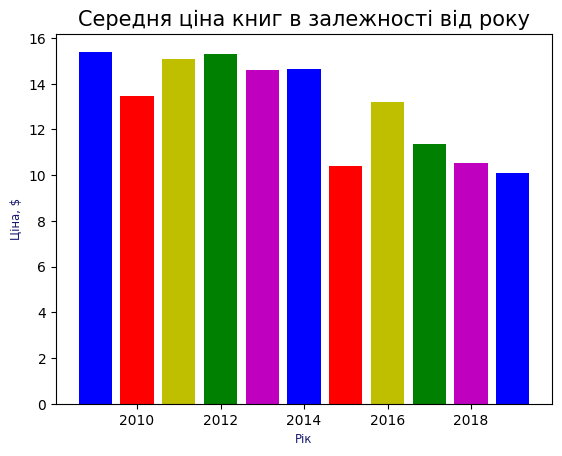

In [33]:
tmp = data.groupby(["year"]).agg(avg = ('price', 'mean'))
plt.xlabel('Рік', fontsize='small', color='midnightblue')
plt.ylabel('Ціна, $', fontsize='small', color='midnightblue')
plt.title('Середня ціна книг в залежності від року', fontsize=15)
plt.bar(tmp.index.values, tmp["avg"].values, color=["b", "r", "y", "g", "m"])
plt.show()

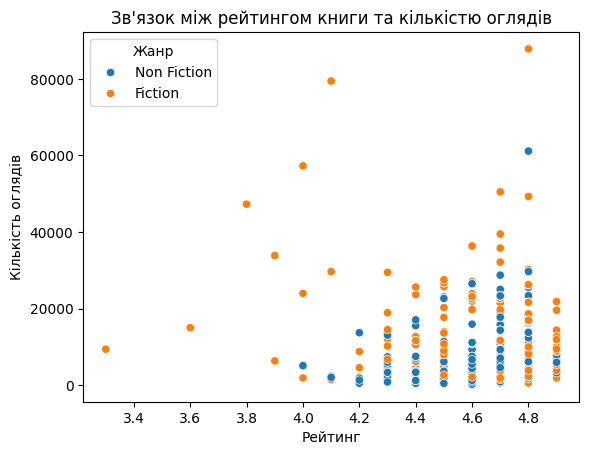

In [34]:
sct_plot = sns.scatterplot(x='user_rating', y='reviews', hue="genre", data=data, color="r").set(title="Зв'язок між рейтингом книги та кількістю оглядів", xlabel='Рейтинг', ylabel='Кількість оглядів')
plt.legend(title="Жанр")
plt.show()

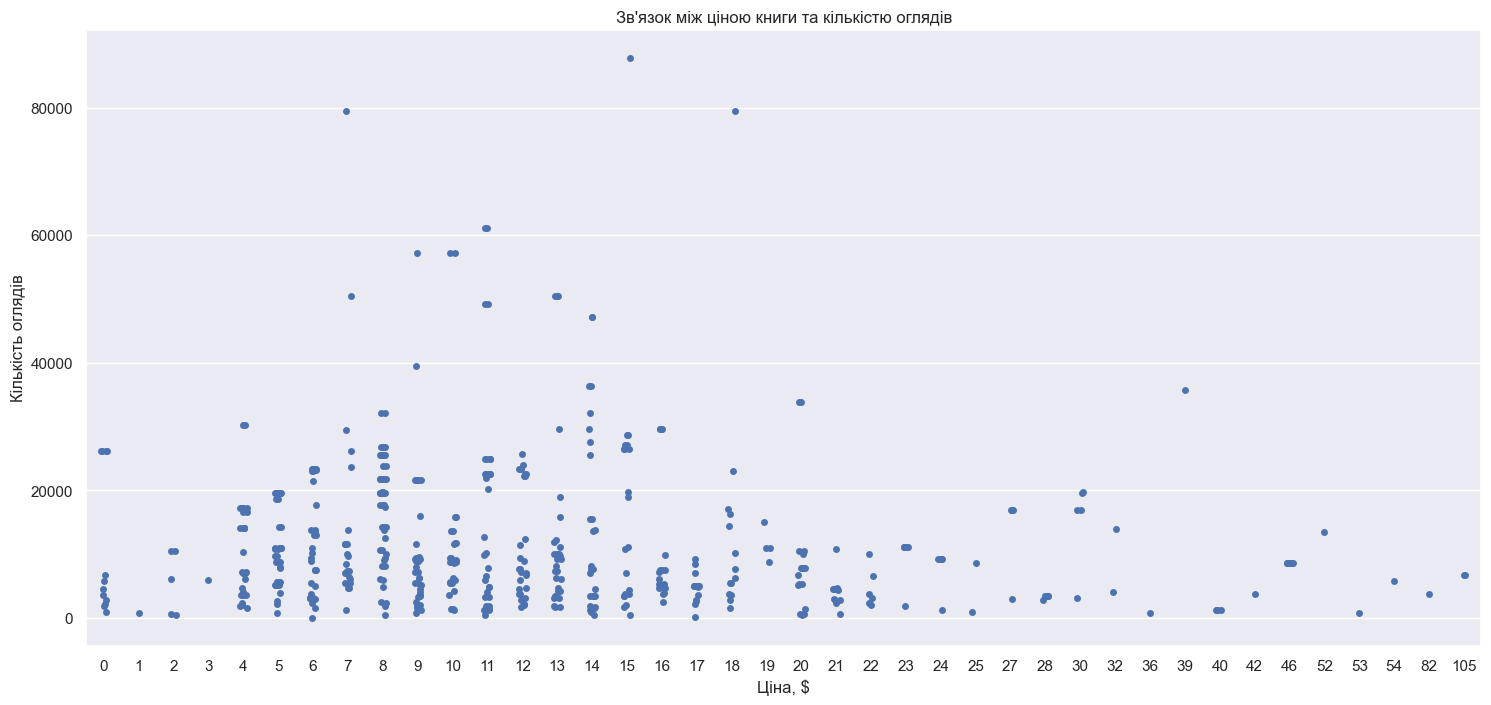

In [35]:
width = 18
height = 8
sns.set(rc = {'figure.figsize':(width, height)})
strp_plot = sns.stripplot(x='price', y='reviews', data=data).set(title="Зв'язок між ціною книги та кількістю оглядів", xlabel='Ціна, $', ylabel='Кількість оглядів')